In [486]:
using Plots

In [487]:
function sven(f, x, h=0.1)
    
    nx = x+h
    if f(nx) > f(x)
        h = -h 
        nx = x+h
    end
    if f(nx) > f(x)
        return min(x, nx), max(x, nx)
    end
    x = nx 
    h = h*2
    while true
        nx = x+h
        if f(nx) > f(x)
            h = -h 
            nx = x+h
        end
        if f(nx) > f(x)
            return min(x, nx), max(x, nx)
        end
        x = nx 
        h = h*2
    end
end

sven (generic function with 2 methods)

In [488]:
function norm(v)
    return sum(v.^2)^0.5
end

norm (generic function with 1 method)

In [489]:
function coord_descent(f, x, a, eps=0.01)
    hist = [copy(x)]
    while true
        old_x = copy(x)
        for i ∈ 1:length(x)
            e = x / norm(x)
            xs = copy(x)
            while true
                nx = x[i]+a*e[i]
                xs[i] = nx
                if f(xs...) > f(x...)
                    nx = x[i]-a*e[i]
                    xs[i] = nx
                    if f(xs...) > f(x...)
                        if a < eps || abs(norm(old_x-x)) < eps
                            return x, hist
                        end
                        a /= 2 
                        continue
                    end
                end
                break
            end
            push!(hist, copy(x))
            x[i] = xs[i]
        end
        if abs(norm(old_x-x)) < eps
            return x, hist
        end
    end
end

coord_descent (generic function with 2 methods)

In [490]:
function golden_section(f, a, b, eps=0.01)
    Fi = (1+5^0.5)/2
    while true
        x1 = b-(b-a)/Fi 
        x2 = a+(b-a)/Fi 
        y1 = f(x1)
        y2 = f(x2)
        if y1 >= y2
            a = x1
        else
            b = x2
        end
        if abs(b-a) < eps
            return (a+b)/2
        end
    end
end

golden_section (generic function with 2 methods)

In [491]:
function Gaus_Zagel(f, x, eps=0.01)
    function nk_f(i, ei)
        function nk_f2(xi)
            xs = copy(x)
            xs[i] += xi*ei
            return f(xs...)
        end
        return nk_f2
        
    end
    hist = [copy(x)]
    while true
        old_x = copy(x)
        for i ∈ 1:length(x)
            e = x / norm(x)
            xs = copy(x)
            # a = golden_section(nk_f(i, e[i]), sven(nk_f(i, e[i]), x[i], 1)...)
            a, _ = random_descent(nk_f(i, e[i]), [0.], 100, 1)
            a = a[1]
            nx = x[i]+a*e[i]
            xs[i] = nx
            x[i] = nx
            push!(hist, copy(x))
        end
        if f(old_x...) < f(x...)
            return old_x, hist
        end
        if abs(norm(old_x-x)) < eps
            return x, hist
        end
    end
end

Gaus_Zagel (generic function with 2 methods)

In [492]:
function Hooke_Jeeves(f, x,d, eps=0.01)
    hist = []
    function nk_f(ei)
        function nk_f2(xi)
            xs = copy(x)
            xs += xi*ei
            return f(xs...)
        end
        return nk_f2
        
    end
    while true
        old_x = copy(x)
        push!(hist, copy(x))
        min_x = []
        for i ∈ 1:length(x)
            xi = x[i]
            xs = copy(x)
            xs2 = copy(x)
            xs[i] = xi-d
            xs2[i] = xi+d
            if f(xs...) < f(xs2...)
                push!(min_x, xs)
            else
                push!(min_x, xs2)
            end
        end
        one_min = min_x[1]
        for i ∈ 2:length(min_x)
            if f(min_x[i]...) < f(one_min...)
                one_min = min_x[i]
            end
        end
        # a = golden_section(nk_f(one_min-x), sven(nk_f(one_min-x), 0, 0.01)...)
        a, _ = random_descent(nk_f(one_min-x), [0.], 100, 0.01)
        a = a[1]
        x += a*(one_min-x)
        if f(old_x...) < f(x...)
            return old_x, hist
        end
        if abs(norm(old_x-x)) < eps
            push!(hist, copy(x))
            return x, hist
        end
        d /= 2
    end
end

Hooke_Jeeves (generic function with 2 methods)

In [493]:
function random_descent(f, x, n, std, eps=0.01)
    hist = [copy(x)]
    while true
        children = [x+randn(length(x))*std for _ ∈ 1:n]
        best = children[1]
        for i ∈ 2:length(children)
            if f(best...) >= f(children[i]...)
                best = children[i]
            end
        end
        if abs(norm(x-best)) < eps
            return best, hist
        end
        x = best
        push!(hist, copy(best))
    end
end

random_descent (generic function with 2 methods)

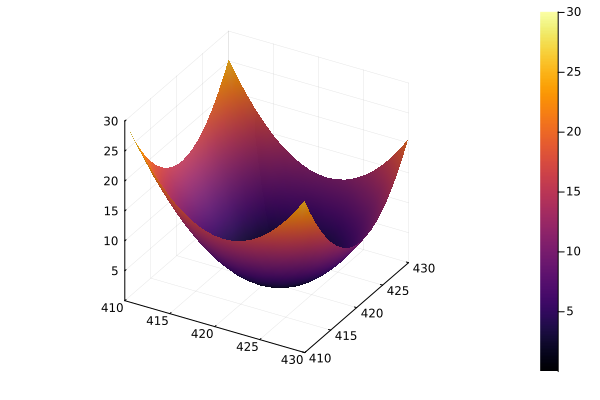

In [494]:
f(x, y) = (x^2+y^2)^0.1
g(x, y) = f(x, y)+randn()*0.1

banan(x, y) = 1*(x^2-y)^2+1*(x-1)^2+0

rastrigin(x, y) = 10 * 2 + x^2 - 10 * cos(2π * x) + y^2 - 10 * cos(2π * y)

schwefel(x, y) = 418.9829 * 2 - (x * sin(sqrt(abs(x))) + y * sin(sqrt(abs(y))))

start2 = [430.0,  430.0]
start1 = [9.0, 9.0]
fin1 = [0.0, 0.0]
fin2 = [420.0, 420.0]

#-10:1:10
xs1 = -10:1:10
ys1 = -10:1:10
xs2 = 410:1:430
ys2 = 410:1:430
surface(xs2, ys2, schwefel)

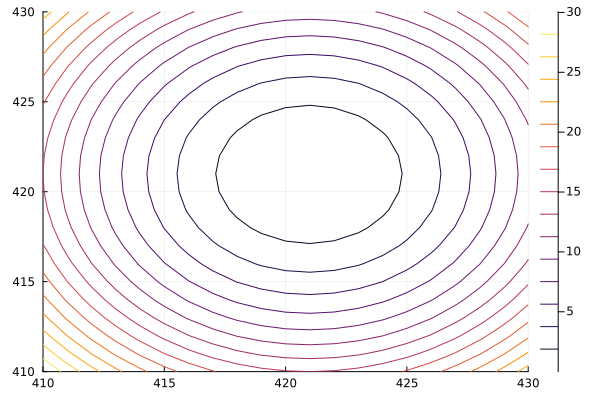

In [495]:
contour(xs2, ys2, schwefel)

In [496]:
x_min, hist = coord_descent(schwefel, copy(start2), 0.01)
println(abs(schwefel(x_min...)- schwefel(fin2...)))
println(length(hist))
contour(xs2, ys2, schwefel)
scatter!([start2[1]], [start2[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
savefig("schwefel_cd.png")

0.23673878500187584
2555


"/home/andrey/work/Optimization/lab2/schwefel_cd.png"

In [497]:
surface(xs2, ys2, schwefel)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [schwefel(h...) for h ∈ hist], color=:red)
savefig("s_schwefel_cd.png")

"/home/andrey/work/Optimization/lab2/s_schwefel_cd.png"

In [498]:
x_min, hist = Gaus_Zagel(schwefel, copy(start2))
println(abs(schwefel(x_min...)- schwefel(fin2...)))
println(length(hist))
contour(xs2, ys2, schwefel)
scatter!([start2[1]], [start2[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
savefig("schwefel_gz.png")

0.23673592550392186
7


"/home/andrey/work/Optimization/lab2/schwefel_gz.png"

In [499]:
surface(xs2, ys2, schwefel)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [schwefel(h...) for h ∈ hist], color=:red)
savefig("s_schwefel_gz.png")

"/home/andrey/work/Optimization/lab2/s_schwefel_gz.png"

In [500]:
x_min, hist = Hooke_Jeeves(schwefel, copy(start2), 0.01)
println(abs(schwefel(x_min...)- schwefel(fin2...)))
println(length(hist))
contour(xs2, ys2, schwefel)
scatter!([start2[1]], [start2[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
plot!([h[1] for h ∈ hist][1:2:end], [h[2] for h ∈ hist][1:2:end])
savefig("schwefel_hj.png")

0.23673932515896468
4


"/home/andrey/work/Optimization/lab2/schwefel_hj.png"

In [501]:
surface(xs2, ys2, schwefel)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [schwefel(h...) for h ∈ hist], color=:red)
savefig("s_schwefel_hj.png")

"/home/andrey/work/Optimization/lab2/s_schwefel_hj.png"

In [502]:
x_min, hist = random_descent(schwefel,  copy(start2), 10000, 10)
println(abs(schwefel(x_min...)- schwefel(fin2...)))
println(length(hist))
contour(xs2, ys2, schwefel)
scatter!([start2[1]], [start2[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
savefig("schwefel_rd.png")

0.23211754355054381
45


"/home/andrey/work/Optimization/lab2/schwefel_rd.png"

In [503]:
surface(xs2, ys2, schwefel)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [schwefel(h...) for h ∈ hist], color=:red)
savefig("s_schwefel_rd.png")

"/home/andrey/work/Optimization/lab2/s_schwefel_rd.png"

In [504]:
x_min, hist = coord_descent(rastrigin, copy(start1), 0.01)
println(abs(rastrigin(x_min...)- rastrigin(fin1...)))
println(length(hist))
contour(xs1, ys1, rastrigin)
scatter!([start1[1]], [start1[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
savefig("rastrigin_cd.png")

161.18246718734696
15


"/home/andrey/work/Optimization/lab2/rastrigin_cd.png"

In [505]:
surface(xs1, ys1, rastrigin)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [rastrigin(h...) for h ∈ hist], color=:red)
savefig("s_rastrigin_cd.png")

"/home/andrey/work/Optimization/lab2/s_rastrigin_cd.png"

In [506]:
x_min, hist = Gaus_Zagel(rastrigin, copy(start1))
println(abs(rastrigin(x_min...)- rastrigin(fin1...)))
println(length(hist))
contour(xs1, ys1, rastrigin)
scatter!([start1[1]], [start1[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
savefig("rastrigin_gz.png")

0.06749483636779985
5


"/home/andrey/work/Optimization/lab2/rastrigin_gz.png"

In [507]:
surface(xs1, ys1, rastrigin)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [rastrigin(h...) for h ∈ hist], color=:red)
savefig("s_rastrigin_gz.png")

"/home/andrey/work/Optimization/lab2/s_rastrigin_gz.png"

In [508]:
x_min, hist = Hooke_Jeeves(rastrigin, copy(start1), 100)
println(abs(rastrigin(x_min...)- rastrigin(fin1...)))
println(length(hist))
contour(xs1, ys1, rastrigin)
scatter!([start1[1]], [start1[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
plot!([h[1] for h ∈ hist][1:2:end], [h[2] for h ∈ hist][1:2:end])
savefig("rastrigin_hj.png")

0.0014392550928086223
5


"/home/andrey/work/Optimization/lab2/rastrigin_hj.png"

In [509]:
surface(xs1, ys1, rastrigin)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [rastrigin(h...) for h ∈ hist], color=:red)
savefig("s_rastrigin_hj.png")

"/home/andrey/work/Optimization/lab2/s_rastrigin_hj.png"

In [510]:
x_min, hist = random_descent(rastrigin,  copy(start1), 10000, 10)
println(abs(rastrigin(x_min...)- rastrigin(fin1...)))
println(length(hist))
contour(xs1, ys1, rastrigin)
scatter!([start1[1]], [start1[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
savefig("rastrigin_rd.png")

1.8901313076308952
694


"/home/andrey/work/Optimization/lab2/rastrigin_rd.png"

In [511]:
surface(xs1, ys1, rastrigin)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [rastrigin(h...) for h ∈ hist], color=:red)
savefig("s_rastrigin_rd.png")

"/home/andrey/work/Optimization/lab2/s_rastrigin_rd.png"

In [512]:
x_min, hist = coord_descent(banan, copy(start1), 0.01)
println(abs(banan(x_min...)- banan(fin1...)))
println(length(hist))
contour(xs1, ys1, banan)
scatter!([start1[1]], [start1[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
savefig("banan_cd.png")

9.606965110060383
2267


"/home/andrey/work/Optimization/lab2/banan_cd.png"

In [513]:
surface(xs1, ys1, banan)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [banan(h...) for h ∈ hist], color=:red)
savefig("s_banan_cd.png")

"/home/andrey/work/Optimization/lab2/s_banan_cd.png"

In [514]:
x_min, hist = Gaus_Zagel(banan, copy(start1))
println(abs(banan(x_min...)- banan(fin1...)))
println(length(hist))
contour(xs1, ys1, banan)
scatter!([start1[1]], [start1[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
savefig("banan_gz.png")

0.9916252061777268
77


"/home/andrey/work/Optimization/lab2/banan_gz.png"

In [515]:
surface(xs1, ys1, banan)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [banan(h...) for h ∈ hist], color=:red)
savefig("s_banan_gz.png")

"/home/andrey/work/Optimization/lab2/s_banan_gz.png"

In [516]:
x_min, hist = Hooke_Jeeves(banan, copy(start1), 10)
println(abs(banan(x_min...)- banan(fin1...)))
println(length(hist))
contour(xs1, ys1, banan)
scatter!([start1[1]], [start1[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)

plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
plot!([h[1] for h ∈ hist][1:2:end], [h[2] for h ∈ hist][1:2:end])
savefig("banan_hj.png")

2.7854198654156996
4


"/home/andrey/work/Optimization/lab2/banan_hj.png"

In [517]:
surface(xs1, ys1, banan)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [banan(h...) for h ∈ hist], color=:red)
savefig("s_banan_hj.png")

"/home/andrey/work/Optimization/lab2/s_banan_hj.png"

In [518]:
x_min, hist = random_descent(banan,  copy(start1), 10000, 10)
println(abs(banan(x_min...)- banan(fin1...)))
println(length(hist))
contour(xs1, ys1, banan)
scatter!([start1[1]], [start1[2]], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:green)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
savefig("banan_rd.png")

0.9689538643880878
272


"/home/andrey/work/Optimization/lab2/banan_rd.png"

In [519]:
surface(xs1, ys1, banan)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist],[0.0 for h ∈ hist], color=:blue)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], [banan(h...) for h ∈ hist], color=:red)
savefig("s_banan_rd.png")

"/home/andrey/work/Optimization/lab2/s_banan_rd.png"